In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats
from ipywidgets import interact
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

In [2]:
clust = pd.read_excel(r'C:\Users\user\Downloads\Telegram Desktop\cluster.xlsx')


In [3]:
clust

Unnamed: 0  XLogP   ExactMass  MonoisotopicMass  TPSA  Complexity  \
0              0   1.10   37.996806         37.996806   0.0         0.0   
1              1  -0.50   18.010565         18.010565   1.0         0.0   
2              2   2.52  208.113086        208.113086  36.9        91.0   
3              3   0.30   60.057515         60.057515  20.2         7.0   
4              4   2.70  154.135765        154.135765  20.2       154.0   
...          ...    ...         ...               ...   ...         ...   
3503        3503  -0.08  181.862488        181.862488  77.5       124.0   
3504        3504   0.90   74.073165         74.073165  20.2        13.0   
3505        3505   0.30   60.057515         60.057515  20.2        10.0   
3506        3506  -3.20   75.032028         75.032028  63.3        42.0   
3507        3507   3.40   84.093900         84.093900   0.0        15.0   

      Charge  HBondDonorCount  HBondAcceptorCount  RotatableBondCount  ...  \
0        0.0              0.0                 2.0                 0.0  ...   
1        0.0              1.0                 1.0                 0.0  ...   
2        0.0              0.0                 4.0                 8.0  ...   
3        0.0              1.0                 1.0                 1.0  ...   
4        0.0              1.0                 1.0                 4.0  ...   
...      ...              ...                 ...                 ...  ...   
3503     0.0              0.0                 5.0                 0.0  ...   
3504     0.0              1.0                 1.0                 2.0  ...   
3505     0.0              1.0                 1.0                 0.0  ...   
3506     0.0              2.0                 3.0                 1.0  ...   
3507     0.0              0.0                 0.0                 0.0  ...   

         SRW10     TSRW10          MW        AMW  WPath  WPol  Zagreb1  \
0     1.098612   7.493061   37.996806  18.998403      1     0        2   
1     0.000000   1.000000   18.010565   6.003522      0     0        0   
2     8.995289  42.807081  208.113086   6.306457    256    16       52   
3     5.509388  22.328143   60.057515   5.004793     10     1       10   
4     8.644883  39.828993  154.135765   5.315026    180    10       46   
...        ...        ...         ...        ...    ...   ...      ...   
3503  7.655864  32.211905  179.868890  25.695556     48     4       26   
3504  6.192362  25.583106   74.073165   4.938211     20     2       14   
3505  6.188264  24.179697   60.057515   5.004793      9     0       12   
3506  6.834109  27.254130   75.032028   7.503203     18     2       16   
3507  7.627057  30.941317   84.093900   4.671883     27     3       24   

      Zagreb2  mZagreb1  mZagreb2  
0           1  2.000000  1.000000  
1           0  2.000000  0.000000  
2          56  6.062500  3.500000  
3           8  2.500000  1.250000  
4          46  6.173611  2.583333  
...       ...       ...       ...  
3503       24  4.472222  1.666667  
3504       12  2.750000  1.500000  
3505        9  3.111111  1.000000  
3506       14  3.361111  1.333333  
3507       24  1.500000  1.500000  

[3508 rows x 1309 columns]

In [29]:
# Функция для создания интерактивного графика
def plot_stats(column):
    # Вычисляем статистические данные
    mean = clust[column].mean()
    std = clust[column].std()
    median = clust[column].median()
    q1 = clust[column].quantile(0.25)
    q3 = clust[column].quantile(0.75)
    iqr = q3 - q1
    
    # Создаем график с помощью seaborn
    sns.histplot(clust[column], kde=True)
    plt.axvline(x = mean, color = 'r', linestyle = '--', label = 'Mean')
    plt.axvline(x=median, color='g', linestyle='--', label='Median')
    plt.axvline(x=q1, color='b', linestyle='--', label='Q1')
    plt.axvline(x=q3, color='b', linestyle='--', label='Q3')
    plt.legend()
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Statistics for {}'.format(column))
    plt.show()
    
    # Создаем график с помощью plotly
    fig = px.box(clust, y=column)
    fig.show()
    
    # Выполняем тест Шапиро-Уилка
    stat, p = stats.shapiro(clust[column])
    print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
    

    
    # Выводим статистические данные
    print('Mean: {:.2f}'.format(mean))
    print('Standard deviation: {:.2f}'.format(std))
    print('Median: {:.2f}'.format(median))
    print('Q1: {:.2f}'.format(q1))
    print('Q3: {:.2f}'.format(q3))
    print('IQR: {:.2f}'.format(iqr))

# Создаем виджет для выбора столбца
interact(plot_stats, column=list(clust.columns))

interactive(children=(Dropdown(description='column', options=('Unnamed: 0', 'XLogP', 'ExactMass', 'Monoisotopi…

<function __main__.plot_stats(column)>

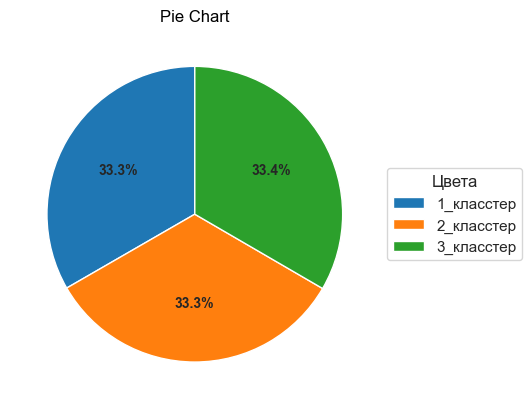

In [5]:
aaa = pd.read_excel(r'C:\Users\user\Downloads\Telegram Desktop\labels.xlsx')
aaa.columns = ['new_col1', 'new_col2' ]
count_1 = 0 
count_2 = 0 
count_3 = 0 
for el in aaa['new_col2']:
    if el == 0:
        count_1 += 1
    if el == 1:
        count_2 += 1
    if el == 2:
        count_3 += 1

# Данные для построения диаграммы
data = {'1_класстер': 1169, '2_класстер': 1168, '3_класстер': 1171}

# Создание диаграммы
fig, ax = plt.subplots()
sns.set(style='whitegrid')

# Построение диаграммы
wedges, texts, autotexts = ax.pie(data.values(), autopct='%1.1f%%', startangle=90)

# Настройка внешнего вида диаграммы
ax.legend(wedges, data.keys(), title='Цвета', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight='bold')
ax.set_title('Pie Chart')

# Отображение диаграммы
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8664\3592856887.py:11: RuntimeWarning:

divide by zero encountered in log10

C:\Users\user\AppData\Local\Temp\ipykernel_8664\3592856887.py:11: RuntimeWarning:

invalid value encountered in log10

C:\Users\user\AppData\Local\Temp\ipykernel_8664\3592856887.py:12: RuntimeWarning:

divide by zero encountered in log10

C:\Users\user\AppData\Local\Temp\ipykernel_8664\3592856887.py:13: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: title={'center': 'Custom plot'}, xlabel='$\\log_{10}XLogP$', ylabel='$\\log_{10}TPSA$'>

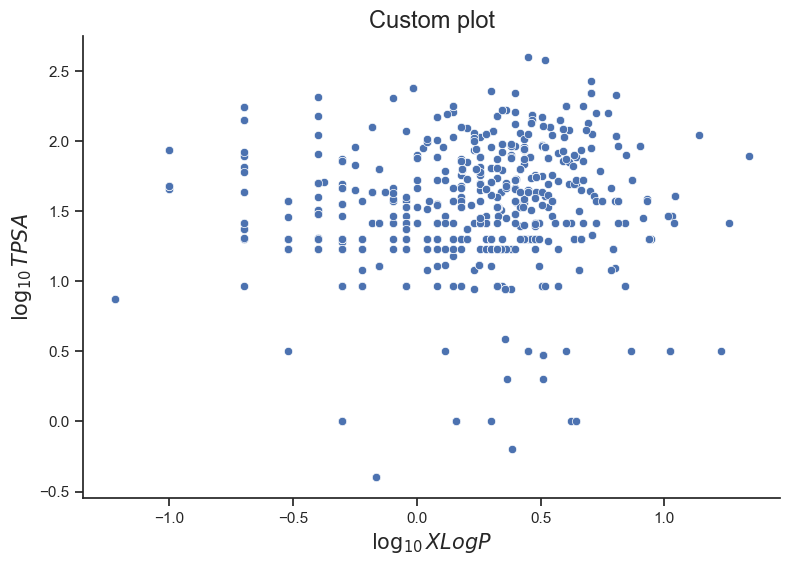

In [6]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}  #hide top and right spines
sns.set_theme(style="ticks", rc=custom_params)      #set style
f, ax = plt.subplots(figsize=(9, 6))                #get figure size
ax.set_title("Custom plot", fontsize=17)            #set plot title
plt.xlabel(r'$\log_{10}XLogP$', fontsize= 15)       #set x-axes title
plt.ylabel( r'$\log_{10}TPSA$', fontsize= 15)
palette="RdBu"
marker = 'o'

# data & plot
x=np.log10(clust.loc[:,'XLogP'].values)
y=np.log10(clust.loc[:,'TPSA'].values)
sns.scatterplot(x=x, y=y, palette=palette, data=clust, marker=marker)

In [7]:

cols = clust.columns[:1309 ]

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(clust[cols].iloc[:,range(1309)].values)

cov_mat =np.cov(X_std.T)


In [8]:
cov_mat

array([[ 1.00028514, -0.00728788, -0.00483301, ..., -0.01661395,
        -0.0065308 , -0.00968803],
       [-0.00728788,  1.00028514,  0.29888321, ...,  0.32023317,
         0.14759077,  0.2777286 ],
       [-0.00483301,  0.29888321,  1.00028514, ...,  0.87677849,
         0.83893544,  0.91463373],
       ...,
       [-0.01661395,  0.32023317,  0.87677849, ...,  1.00028514,
         0.72024713,  0.9013612 ],
       [-0.0065308 ,  0.14759077,  0.83893544, ...,  0.72024713,
         1.00028514,  0.78213881],
       [-0.00968803,  0.2777286 ,  0.91463373, ...,  0.9013612 ,
         0.78213881,  1.00028514]])

In [24]:
FILTER_THRESHOLD = 0.9

cov_mat_df = pd.DataFrame(cov_mat, columns=cols)

upper_tri = cov_mat_df.where(
    np.triu(
        np.ones(cov_mat_df.shape), k=1).astype(np.bool)
        )

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > FILTER_THRESHOLD)]

df_after_FS = clust.drop(to_drop, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_8664\2595055603.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [25]:
upper_tri

Unnamed: 0     XLogP  ExactMass  MonoisotopicMass      TPSA    Charge  \
0          NaN -0.007288  -0.004833         -0.004877  0.000660  0.002779   
1          NaN       NaN   0.298883          0.298775 -0.289891  0.087822   
2          NaN       NaN        NaN          1.000283  0.688533  0.040851   
3          NaN       NaN        NaN               NaN  0.688791  0.040840   
4          NaN       NaN        NaN               NaN       NaN -0.041064   
..         ...       ...        ...               ...       ...       ...   
95         NaN       NaN        NaN               NaN       NaN       NaN   
96         NaN       NaN        NaN               NaN       NaN       NaN   
97         NaN       NaN        NaN               NaN       NaN       NaN   
98         NaN       NaN        NaN               NaN       NaN       NaN   
99         NaN       NaN        NaN               NaN       NaN       NaN   

    HBondDonorCount  HBondAcceptorCount  RotatableBondCount  HeavyAtomCount  \
0         -0.011806            0.002341           -0.001277       -0.011729   
1         -0.360611           -0.248256            0.203604        0.292938   
2          0.529614            0.741521            0.669008        0.948117   
3          0.529839            0.741749            0.669238        0.948360   
4          0.798789            0.926607            0.446544        0.694565   
..              ...                 ...                 ...             ...   
95              NaN                 NaN                 NaN             NaN   
96              NaN                 NaN                 NaN             NaN   
97              NaN                 NaN                 NaN             NaN   
98              NaN                 NaN                 NaN             NaN   
99              NaN                 NaN                 NaN             NaN   

    ...  SlogP_VSA6  SlogP_VSA7  SlogP_VSA8  SlogP_VSA9    TPSA.1  \
0   ...   -0.012088   -0.012411   -0.003394         0.0  0.003164   
1   ...    0.354851   -0.040596    0.321643         0.0 -0.284152   
2   ...    0.514992    0.209423    0.332371         0.0  0.674166   
3   ...    0.515178    0.209484    0.332475         0.0  0.674420   
4   ...    0.269544    0.076461    0.097006         0.0  0.956042   
..  ...         ...         ...         ...         ...       ...   
95  ...         NaN         NaN         NaN         NaN       NaN   
96  ...         NaN         NaN         NaN         NaN       NaN   
97  ...         NaN         NaN         NaN         NaN       NaN   
98  ...         NaN         NaN         NaN         NaN       NaN   
99  ...         NaN         NaN         NaN         NaN       NaN   

    EState_VSA1  EState_VSA10  EState_VSA11  EState_VSA2  EState_VSA3  
0     -0.013102      0.002367     -0.016076     0.043818     0.001591  
1      0.344472      0.094606      0.046148     0.094557     0.004608  
2      0.859976      0.606141      0.428438     0.104851     0.088710  
3      0.860215      0.606350      0.428564     0.104939     0.088749  
4      0.566327      0.544373      0.348628     0.005220     0.116017  
..          ...           ...           ...          ...          ...  
95          NaN      0.625871      0.462577    -0.105156     0.060716  
96          NaN           NaN      0.394827    -0.027516     0.037867  
97          NaN           NaN           NaN    -0.035662    -0.009318  
98          NaN           NaN           NaN          NaN     0.047786  
99          NaN           NaN           NaN          NaN          NaN  

[100 rows x 100 columns]

In [26]:
df_after_FS

Unnamed: 0  XLogP   ExactMass  TPSA  Complexity  Charge  \
0              0   1.10   37.996806   0.0         0.0     0.0   
1              1  -0.50   18.010565   1.0         0.0     0.0   
2              2   2.52  208.113086  36.9        91.0     0.0   
3              3   0.30   60.057515  20.2         7.0     0.0   
4              4   2.70  154.135765  20.2       154.0     0.0   
...          ...    ...         ...   ...         ...     ...   
3503        3503  -0.08  181.862488  77.5       124.0     0.0   
3504        3504   0.90   74.073165  20.2        13.0     0.0   
3505        3505   0.30   60.057515  20.2        10.0     0.0   
3506        3506  -3.20   75.032028  63.3        42.0     0.0   
3507        3507   3.40   84.093900   0.0        15.0     0.0   

      HBondDonorCount  RotatableBondCount  IsotopeAtomCount  AtomStereoCount  \
0                 0.0                 0.0                 0              0.0   
1                 1.0                 0.0                 0              0.0   
2                 0.0                 8.0                 0              0.0   
3                 1.0                 1.0                 0              0.0   
4                 1.0                 4.0                 0              1.0   
...               ...                 ...               ...              ...   
3503              0.0                 0.0                 0              0.0   
3504              1.0                 2.0                 0              0.0   
3505              1.0                 0.0                 0              0.0   
3506              2.0                 1.0                 0              0.0   
3507              0.0                 0.0                 0              0.0   

      ...     SRW10     TSRW10          MW        AMW  WPath  WPol  Zagreb1  \
0     ...  1.098612   7.493061   37.996806  18.998403      1     0        2   
1     ...  0.000000   1.000000   18.010565   6.003522      0     0        0   
2     ...  8.995289  42.807081  208.113086   6.306457    256    16       52   
3     ...  5.509388  22.328143   60.057515   5.004793     10     1       10   
4     ...  8.644883  39.828993  154.135765   5.315026    180    10       46   
...   ...       ...        ...         ...        ...    ...   ...      ...   
3503  ...  7.655864  32.211905  179.868890  25.695556     48     4       26   
3504  ...  6.192362  25.583106   74.073165   4.938211     20     2       14   
3505  ...  6.188264  24.179697   60.057515   5.004793      9     0       12   
3506  ...  6.834109  27.254130   75.032028   7.503203     18     2       16   
3507  ...  7.627057  30.941317   84.093900   4.671883     27     3       24   

      Zagreb2  mZagreb1  mZagreb2  
0           1  2.000000  1.000000  
1           0  2.000000  0.000000  
2          56  6.062500  3.500000  
3           8  2.500000  1.250000  
4          46  6.173611  2.583333  
...       ...       ...       ...  
3503       24  4.472222  1.666667  
3504       12  2.750000  1.500000  
3505        9  3.111111  1.000000  
3506       14  3.361111  1.333333  
3507       24  1.500000  1.500000  

[3508 rows x 1280 columns]

In [27]:
cols = df_after_FS.columns[:100 ]

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(clust[cols].iloc[:,range(100)].values)

cov_mat =np.cov(X_std.T)
plt.figure(figsize=(100,100))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix', size = 18)
plt.tight_layout()
plt.show()